In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import fnmatch
from tqdm import tqdm
import matplotlib

# Load data from *.json-files

In [2]:
data_dir = '../scratch-normal/batch_01/' # specify data folder here

In [3]:
data = [] # list container to store the data 

for file in tqdm(sorted(fnmatch.filter(os.listdir(data_dir),"*.json"))):
    with open(os.path.join(data_dir,file)) as f:
        tmp = json.load(f)
    data.append(tmp)
print('loaded %s file(s)' %len(data))

100%|██████████| 112/112 [00:00<00:00, 1233.36it/s]

loaded 112 file(s)


In [4]:
t_adh_lst = []
c_lst = []

for dict_data in data:
    t_adh_lst.append(dict_data["settings"]["thickness_adhesive"])
    c_lst.append(dict_data["settings"]["crack_density"])
print(t_adh_lst)
print(c_lst)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0,

## functions to select the data by Crackdensity $c$ or adhesive thickness $t_{adh}$

In [5]:
def select_t(data,t):
    index = []
    for n, dict_data in enumerate(data):
        if dict_data["settings"]["thickness_adhesive"] == t:
            index.append(n)
        
    return index 

In [6]:
def select_c(data,c):
    index = []
    for n, dict_data in enumerate(data):
        if dict_data["settings"]["crack_density"] == c:
            index.append(n)
        
    return index 

## Get the unique Crackdensities and Adhesive Thicknesses

In [7]:
c_unique = np.unique(c_lst)
t_unique = np.unique(t_adh_lst)

### Define Colormap for the Range of Adhesive thcikenesses

In [8]:
norm = matplotlib.colors.LogNorm(vmin=min(t_adh_lst), vmax=max(t_adh_lst))

cmap = matplotlib.cm.get_cmap('viridis')

## Plot the Stiffness degradation $D$


$$ D=C_{xx}/C_{xx,0}$$

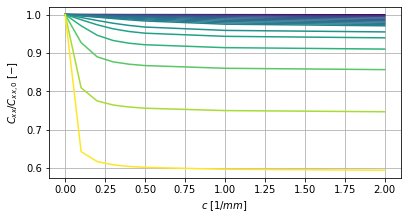

In [9]:
fig, axs = plt.subplots(1,1,figsize=(6.3,6.3/2))

# axs = axs.flatten().to_list
for t_i in t_unique:
    index = select_t(data,t=t_i)

    x_plot = [0]
    y_plot = [1]

    for n in index:
        dict_data = data[n]
        models = dict_data["settings"]["name"]

        x0 = dict_data[models[1]]["results"]["eps_x_hom"]
        y0 = dict_data[models[1]]["results"]["sigma_x_hom"] 

        x1 = dict_data[models[0]]["results"]["eps_x_hom"]
        y1 = dict_data[models[0]]["results"]["sigma_x_hom"] 

        C_xx0 = (y0[-1])/(x0[-1])
        C_xx1 = (y1[-1])/(x1[-1])

        x_plot.append(c_lst[n])
        y_plot.append(C_xx1/C_xx0)
    axs.plot(x_plot,y_plot,'-',color=cmap(norm(t_i)))

axs.grid()

axs.set_xlabel("$c\; [1/mm]$ ")
axs.set_ylabel(r'$C_{xx}/C_{xx,0}\; [-]$')
fig.savefig("stifness.pdf")

In [10]:
def alpha_param(E_adh,E_sub,nu_adh,nu_sub):
    E_adh_ = E_adh /(1-nu_adh**2)
    E_sub_ = E_sub /(1-nu_sub**2)
    return (E_sub_-E_adh_)/(E_sub_+E_adh_)


def beta_param(E_adh,E_sub,nu_adh,nu_sub):
    E_adh_ = E_adh /(1-nu_adh**2)
    E_sub_ = E_sub /(1-nu_sub**2)
    return (E_sub_*((1-2*nu_adh)/2/(1-nu_adh))-E_adh_*((1-2*nu_sub)/2/(1-nu_sub)))/(E_sub_+E_adh_)

In [11]:
alpha = alpha_param(2.7e3,39093,0.38,0.230)
beta = beta_param(2.7e3,39093,0.38,0.230)
print(alpha,beta)

0.8579552839854468 0.1548981805398189


## Auswertung ERR

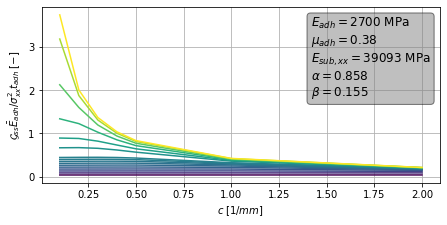

In [35]:

fig, axs = plt.subplots(1,1,figsize=(6.3,6.3/2))

# axs = axs.flatten().to_list
for t_i in t_unique[:]:
    index = select_t(data,t=t_i)

    x_plot = []
    y_plot = []

    for n in index:
        dict_data = data[n]
        models = dict_data["settings"]["name"]
        E_adh,nu_adh = dict_data["settings"]["AdhesiveProperties"][0]
        E_sub_xx = dict_data["settings"]["CompositeProperties"][0][0]
        
        E_bar_adh = E_adh/(1-nu_adh**2)

        # print(E_bar_adh)
        # print(t_i)
        

        e0 = dict_data[models[1]]["results"]["eps_x_hom"]
        s0 = dict_data[models[1]]["results"]["sigma_x_hom"]
        y0 = dict_data[models[1]]["results"]["ALLWK"] 

        e1 = dict_data[models[0]]["results"]["eps_x_hom"]
        s1 = dict_data[models[0]]["results"]["sigma_x_hom"] 
        y1 = dict_data[models[0]]["results"]["ALLWK"] 

        Gss = np.array(y0) - np.array(y1)
        
        f = (Gss[-1]*E_bar_adh)/((e1[-1]*E_bar_adh)**2*t_i)

        x_plot.append(c_lst[n])
        y_plot.append(f)


    axs.plot(x_plot,y_plot,'-',color=cmap(norm(t_i)))

axs.grid()

axs.set_xlabel("$c\; [1/mm]$ ")
axs.set_ylabel(r'$\mathcal{G}_{ss}\bar{E}_{adh}/\sigma_{xx}^2 t_{adh}\; [-]$')
fig.savefig("ERR_results.pdf")

textstr = '\n'.join((
    r'$E_{adh}=%.f$ MPa' % (E_adh, ),
    r'$\mu_{adh}=%.2f$' % (nu_adh, ),
    r'$E_{sub,xx}=%.f$ MPa' % (E_sub_xx, ),
    r'$\alpha=%.3f$ ' % (alpha, ),
    r'$\beta=%.3f$  ' % (beta, )
    )
    )


# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='gray', alpha=0.5)

# place a text box in upper left in axes coords
axs.text(0.675, 0.95, textstr, transform=axs.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='left',bbox=props)

fig.savefig('crackdensity.pdf')
fig.tight_layout(pad=1)